In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("income.csv")

In [46]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [47]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [48]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [49]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [50]:
df.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [51]:
pd.get_dummies(df.occupation)

,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
48838,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
48839,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [52]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('martial-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)
df = df.drop('fnlwgt', axis=1)

In [53]:
df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,Male,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,Male,0,0,50,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,Male,0,0,40,>50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,Male,7688,0,40,>50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,10,Female,0,0,30,<=50K,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,Female,0,0,38,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9,Male,0,0,40,>50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9,Female,0,0,40,<=50K,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9,Male,0,0,20,<=50K,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [54]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [55]:
df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,1,7688,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,10,0,0,0,30,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,9,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,9,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48840,22,9,1,0,0,20,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

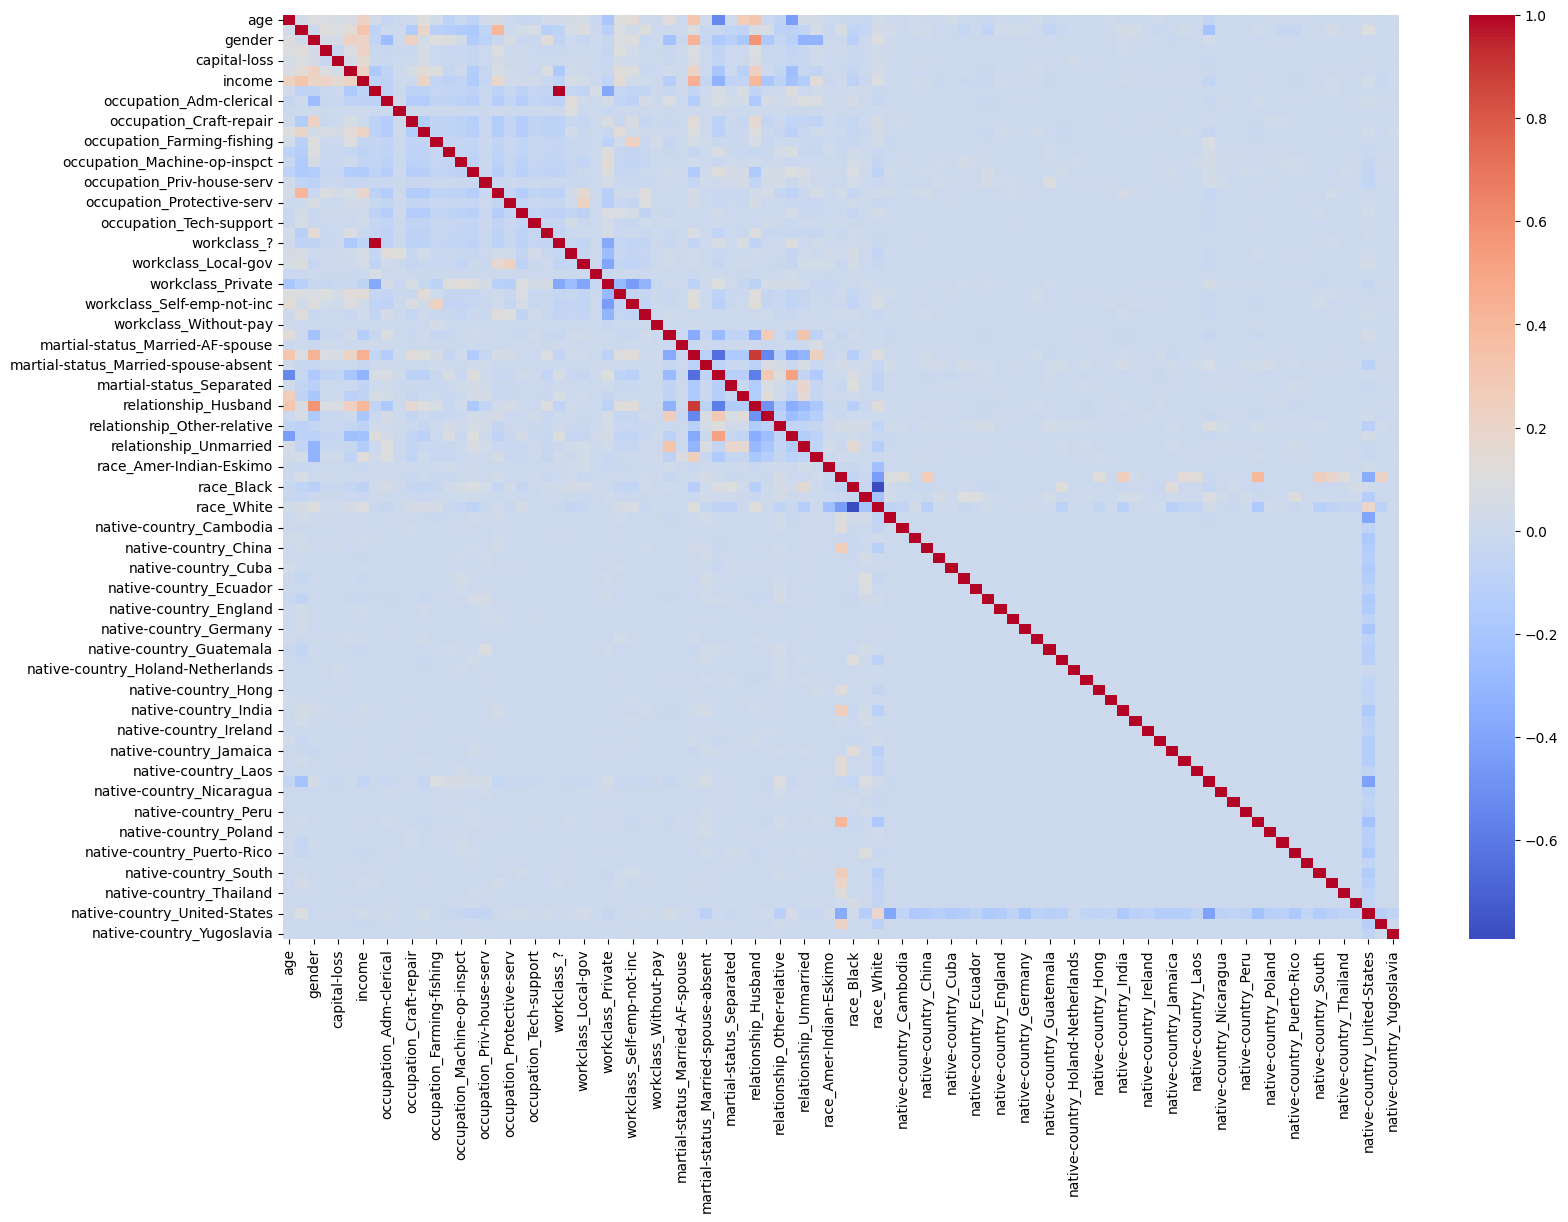

In [57]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [58]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)                                     

In [59]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,martial-status_Divorced,martial-status_Married-civ-spouse,martial-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

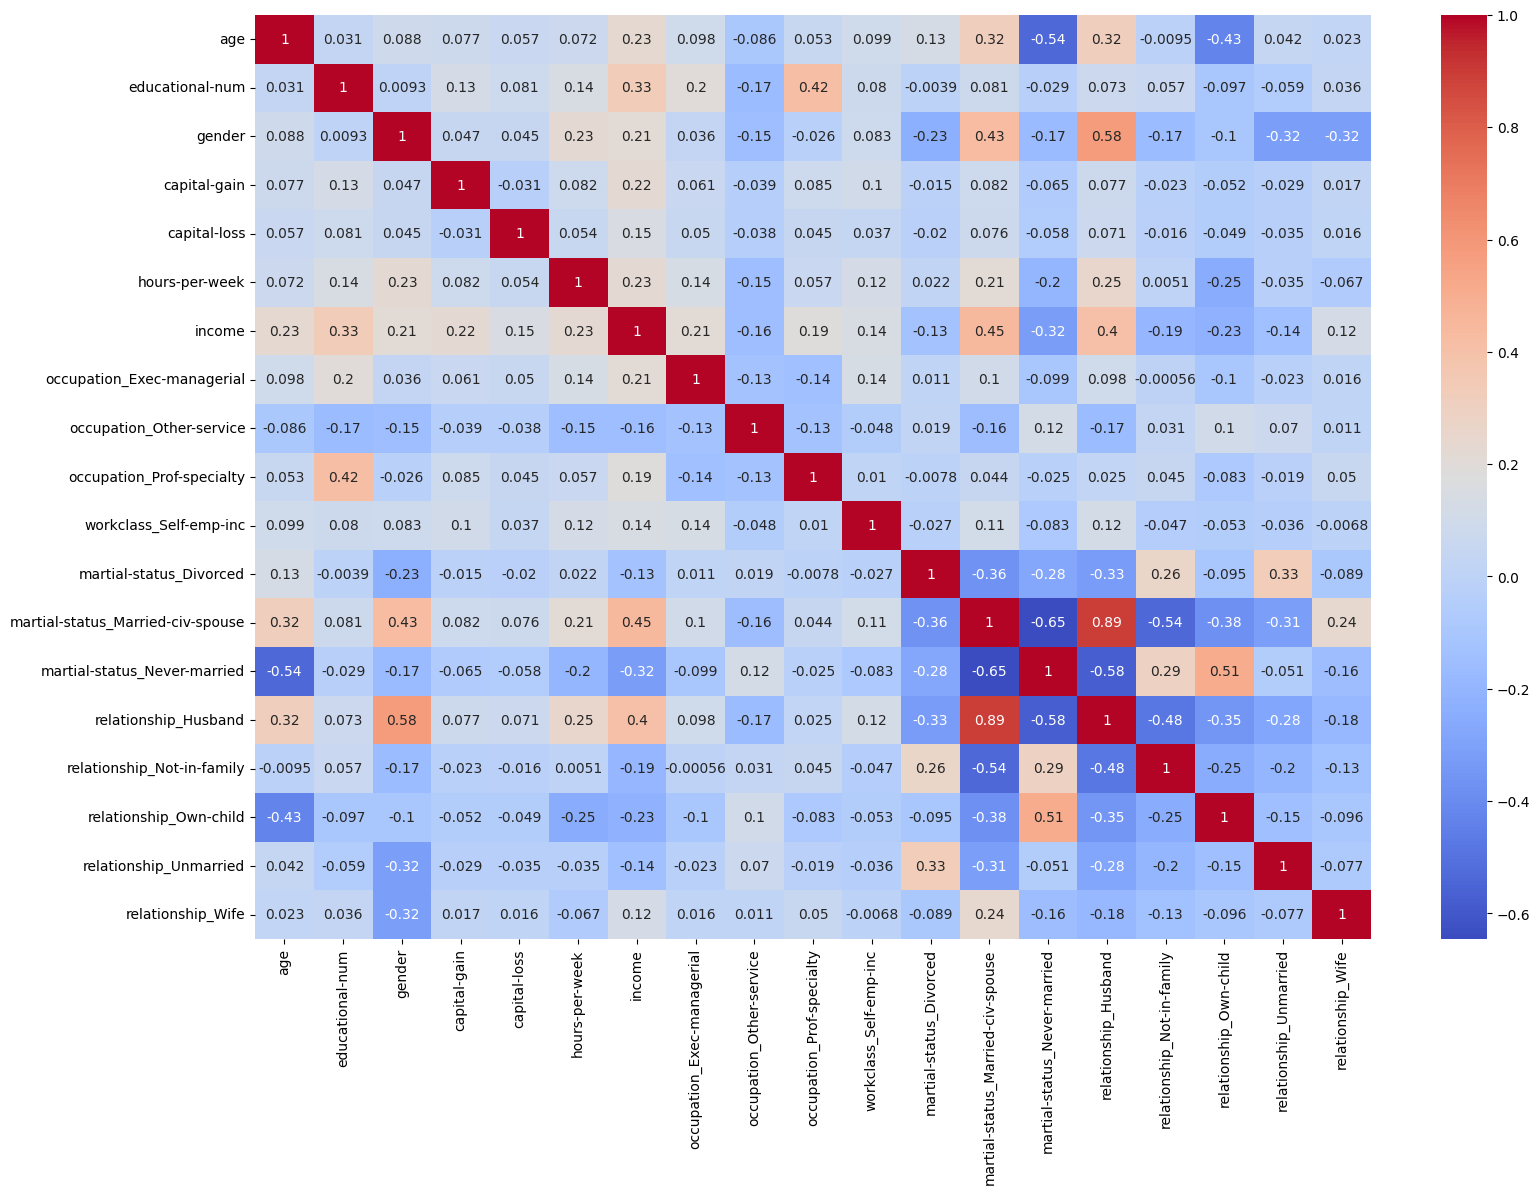

In [60]:
plt.figure(figsize=(18, 12))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2)

In [62]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
4791,31,9,1,0,0,50,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
19645,20,10,0,0,0,25,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
27971,35,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
12012,20,9,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
37428,39,10,1,0,2415,99,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33727,40,13,1,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
27444,23,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
35084,33,12,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20857,43,9,0,0,0,21,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [63]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
25892,19,10,0,0,0,35,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
47104,36,13,0,0,1741,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
924,29,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
21935,25,13,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20702,53,9,1,99999,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,30,14,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
13863,23,9,0,8614,0,15,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
37160,53,9,1,0,1977,40,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
48663,44,9,0,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [64]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [65]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [66]:
forest.score(test_X, test_y)

0.8485003582761798

In [67]:
forest.feature_importances_

array([2.31579002e-01, 1.33977575e-01, 1.46100846e-02, 1.11275443e-01,
       3.81994909e-02, 1.13938128e-01, 1.92666360e-03, 5.09207217e-03,
       6.30086633e-05, 5.65530085e-03, 2.06098551e-02, 3.76518179e-03,
       3.72881359e-03, 3.81619605e-03, 7.67775610e-03, 2.13452249e-04,
       1.70960924e-02, 2.80188016e-03, 6.00412438e-03, 4.17904102e-03,
       4.31314726e-03, 1.74047428e-03, 4.87117301e-03, 5.31205382e-03,
       1.05610196e-06, 9.34944264e-03, 6.39228098e-03, 8.28561848e-03,
       4.45763504e-03, 1.68457332e-04, 7.32473301e-03, 2.68410402e-04,
       6.53777131e-02, 9.93019880e-04, 2.79987355e-02, 2.06160444e-03,
       1.66469857e-03, 4.00551346e-02, 1.25237293e-02, 1.61080745e-03,
       1.03029174e-02, 6.00292992e-03, 9.50048348e-03, 1.40032695e-03,
       2.76597495e-03, 4.58125456e-03, 9.78823982e-04, 6.08902541e-03,
       2.90333736e-03, 1.81225587e-04, 1.33213536e-03, 6.59936954e-04,
       2.81947901e-04, 7.43378778e-04, 2.38473860e-04, 1.37111774e-04,
      

In [68]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'martial-status_Divorced', 'martial-status_Married-AF-spouse',
       'martial-status_Married-civ-spouse',
       'martial-status_Married-spouse-absent',
       'martial-status_Never-mar

In [69]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [70]:
importances

{'age': 0.2315790019051655,
 'educational-num': 0.13397757504349023,
 'hours-per-week': 0.11393812835967447,
 'capital-gain': 0.11127544263373748,
 'martial-status_Married-civ-spouse': 0.0653777130529845,
 'relationship_Husband': 0.04005513459875568,
 'capital-loss': 0.038199490865957364,
 'martial-status_Never-married': 0.027998735475251512,
 'occupation_Exec-managerial': 0.020609855107262244,
 'occupation_Prof-specialty': 0.017096092413401473,
 'gender': 0.014610084627565554,
 'relationship_Not-in-family': 0.012523729297761323,
 'relationship_Own-child': 0.01030291736371869,
 'relationship_Wife': 0.00950048347786756,
 'workclass_Private': 0.00934944264009456,
 'workclass_Self-emp-not-inc': 0.008285618480686548,
 'occupation_Other-service': 0.0076777560952145,
 'martial-status_Divorced': 0.0073247330113648665,
 'workclass_Self-emp-inc': 0.00639228097504738,
 'native-country_United-States': 0.00618349592773977,
 'race_White': 0.006089025409823345,
 'occupation_Sales': 0.006004124378273

In [71]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [75]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.5s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.5s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.847 total time=   0.6s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.8s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [76]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4)

In [77]:
forest = grid_search.best_estimator_

In [78]:
forest.score(test_X, test_y)

0.8602722898966118

In [79]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [80]:
importances

{'age': 0.14927576836822548,
 'educational-num': 0.1395607133655668,
 'capital-gain': 0.13501265602456264,
 'hours-per-week': 0.0888647026476095,
 'martial-status_Married-civ-spouse': 0.084290532928097,
 'relationship_Husband': 0.06682616673494547,
 'capital-loss': 0.04449781585292976,
 'martial-status_Never-married': 0.033563787390094274,
 'occupation_Exec-managerial': 0.024081344723676967,
 'occupation_Prof-specialty': 0.02195231175451149,
 'relationship_Not-in-family': 0.014551516814802646,
 'gender': 0.014085977521999972,
 'relationship_Wife': 0.011978521264761718,
 'relationship_Own-child': 0.010430052327861705,
 'occupation_Other-service': 0.009514268181448142,
 'martial-status_Divorced': 0.009462039944234762,
 'workclass_Self-emp-not-inc': 0.008386882574506533,
 'workclass_Private': 0.008259102479052184,
 'workclass_Self-emp-inc': 0.007691437090648707,
 'relationship_Unmarried': 0.006792333194559138,
 'native-country_United-States': 0.006046013848974793,
 'race_White': 0.0058344